# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

In [1]:
from string import punctuation
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

In [2]:
def is_palindrome(string):
    string = [c for c in string.lower() if c.isalnum()]
    for i in range(len(string)//2):
        if string[i] != string[~i]:
            return False
    return True

In [3]:
is_palindrome("Was it a car or a cat I saw?")

True

In [4]:
is_palindrome("something")

False

2. Write a function that checks whether a number is prime or not **1 pt.**

In [5]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

In [6]:
is_prime(9941)

True

In [7]:
is_prime(42)

False

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

In [8]:
file = "data/allstar.txt"

with open(file, "r+") as f:
    allstar_text = [line.strip() for line in f]
    allstar_text = [line for line in allstar_text if line != ""]

section_slices = {
    "verse1": slice(0, 25),
    "chorus1": slice(25, 34),
    "verse2": slice(34, 51),
    "chorus2": slice(51, 68),
    "verse3": slice(68, 93),
    "chorus3": slice(93, 103),
}

section_chords = {}
allstar_lyrics = ""
for section, slice_ in section_slices.items():
    section_text = allstar_text[slice_]
    
    # Get chords
    chords = section_text[1::2]
    chords = ", ".join([", ".join(c.split()) for c in chords])
    section_chords[section] = chords
    
    # Get lyrics
    section_lyrics = "\n".join(section_text[2::2])
    allstar_lyrics += "\n" + section_lyrics

In [9]:
section_chords

{'verse1': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C',
 'chorus1': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C',
 'verse2': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C',
 'chorus2': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C, G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C',
 'verse3': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C',
 'chorus3': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C'}

In [10]:
print(allstar_lyrics)


Somebody once told me the world is gonna roll me
I ain't the sharpest tool in the shed
She was looking kinda dumb with her finger and her
Thumb in the shape of an "L" on her forehead
Well the years start coming and they don't stop coming
Back to the rules and I hit the ground running
Didn't make sense not to live for fun
Your brain gets smart but your head gets dumb
So much to do so much to see
So what's wrong with taking the back streets
You'll never know if you don't go
You'll never shine if you don't glow
Hey now you're an All Star get your game on, go play
Hey now you're a Rock Star get the show on get paid
And all that glitters is gold
Only shooting stars break the mold
It's a cool place and they say it gets colder
You're bundled up now but wait 'til you get older
But the media men beg to differ
Judging by the hole in the satellite picture
The ice we skate is getting pretty thin
The waters getting warm so you might as well swim
My world's on fire how about yours
That's the way I 

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

In [11]:
%pprint

Pretty printing has been turned OFF


In [12]:
allstar_lyrics = allstar_lyrics.lower().split()
word_freq = {}
for word in allstar_lyrics:
    word_freq[word] = word_freq.get(word, 0) + 1

word_freq

{'somebody': 2, 'once': 2, 'told': 1, 'me': 2, 'the': 26, 'world': 1, 'is': 6, 'gonna': 1, 'roll': 1, 'i': 8, "ain't": 1, 'sharpest': 1, 'tool': 1, 'in': 3, 'shed': 1, 'she': 1, 'was': 1, 'looking': 1, 'kinda': 1, 'dumb': 3, 'with': 3, 'her': 3, 'finger': 1, 'and': 12, 'thumb': 1, 'shape': 1, 'of': 1, 'an': 5, '"l"': 1, 'on': 6, 'forehead': 1, 'well': 3, 'years': 2, 'start': 2, 'coming': 4, 'they': 3, "don't": 6, 'stop': 2, 'back': 4, 'to': 10, 'rules': 2, 'hit': 2, 'ground': 2, 'running': 2, "didn't": 2, 'make': 2, 'sense': 2, 'not': 2, 'live': 2, 'for': 3, 'fun': 2, 'your': 8, 'brain': 2, 'gets': 5, 'smart': 2, 'but': 4, 'head': 2, 'so': 7, 'much': 4, 'do': 2, 'see': 2, "what's": 2, 'wrong': 2, 'taking': 2, 'streets': 2, "you'll": 4, 'never': 5, 'know': 2, 'if': 4, 'you': 7, 'go': 6, 'shine': 2, 'glow': 2, 'hey': 8, 'now': 9, "you're": 9, 'all': 9, 'star': 8, 'get': 15, 'game': 4, 'on,': 4, 'play': 4, 'a': 8, 'rock': 4, 'show': 4, 'paid': 4, 'that': 4, 'glitters': 4, 'gold': 4, 'only

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**

In [13]:
from bs4 import BeautifulSoup
file = 'data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html'
soup = BeautifulSoup(open(file))

In [14]:
parent_div = soup.find('div', {"class": 'col-xs-12 col-lg-8 text-center'})
lyrics_div = parent_div.find('div', {"class": None})
lyrics = lyrics_div.get_text()
print(lyrics)



We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy

I just wanna tell you how I'm feeling
Gotta make you understand

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

We've known each other for so long
Your heart's been aching, but
You're too shy to say it
Inside, we both know what's been going on
We know the game and we're gonna play it

And if you ask me how I'm feeling
Don't tell me you're too blind to see

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

(Ooh, give you up)
(Ooh, g

- How many unique words are there?

In [15]:
words = [w.strip("(),").lower() for w in lyrics.split()]
len(set(words))

78

- List what will Rick Astley never do?

In [16]:
%pprint

Pretty printing has been turned ON


In [17]:
[line for line in lyrics.split("\n") if line.startswith("Never gonna")]

['Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give, never gonna give',
 'Never gonna give, never gonna give',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never go

In [18]:
%pprint

Pretty printing has been turned OFF


- Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**

In [19]:
def get_word_frequencies(text):
    # Remove headers and strip punctuation
    words = [w for w in text.split() if not (w.startswith("[") or w.endswith("]"))]
    words = [w.strip(punctuation).lower() for w in words]
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

In [20]:
get_word_frequencies(lyrics)

{"we're": 3, 'no': 1, 'strangers': 1, 'to': 4, 'love': 1, 'you': 41, 'know': 5, 'the': 3, 'rules': 1, 'and': 16, 'so': 3, 'do': 1, 'i': 3, 'a': 7, 'full': 1, "commitment's": 1, 'what': 1, "i'm": 4, 'thinking': 1, 'of': 1, "wouldn't": 1, 'get': 1, 'this': 1, 'from': 1, 'any': 1, 'other': 3, 'guy': 1, 'just': 2, 'wanna': 2, 'tell': 9, 'how': 3, 'feeling': 3, 'gotta': 2, 'make': 8, 'understand': 2, 'never': 40, 'gonna': 42, 'give': 14, 'up': 10, 'let': 6, 'down': 6, 'run': 6, 'around': 6, 'desert': 6, 'cry': 6, 'say': 8, 'goodbye': 6, 'lie': 6, 'hurt': 6, "we've": 2, 'known': 2, 'each': 2, 'for': 2, 'long': 2, 'your': 2, "heart's": 2, 'been': 4, 'aching': 2, 'but': 2, "you're": 3, 'too': 3, 'shy': 2, 'it': 4, 'inside': 2, 'we': 4, 'both': 2, "what's": 2, 'going': 2, 'on': 2, 'game': 2, 'play': 2, 'if': 1, 'ask': 1, 'me': 2, "don't": 1, 'blind': 1, 'see': 1, 'ooh': 2}

- Use the dictionary from above to create a word count histogram.

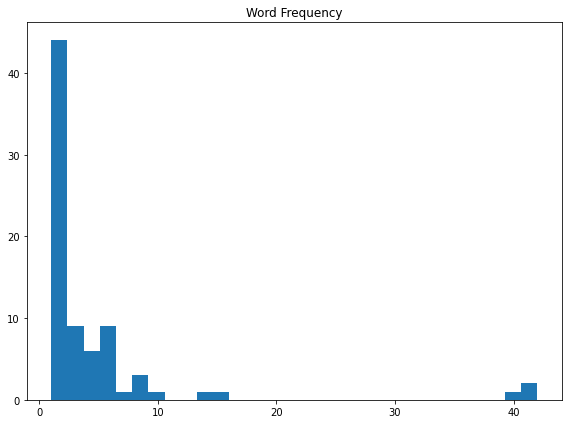

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

rick_astley_word_freq = get_word_frequencies(lyrics)
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(rick_astley_word_freq.values(), bins=30)
plt.title("Word Frequency")
plt.tight_layout()
plt.show()

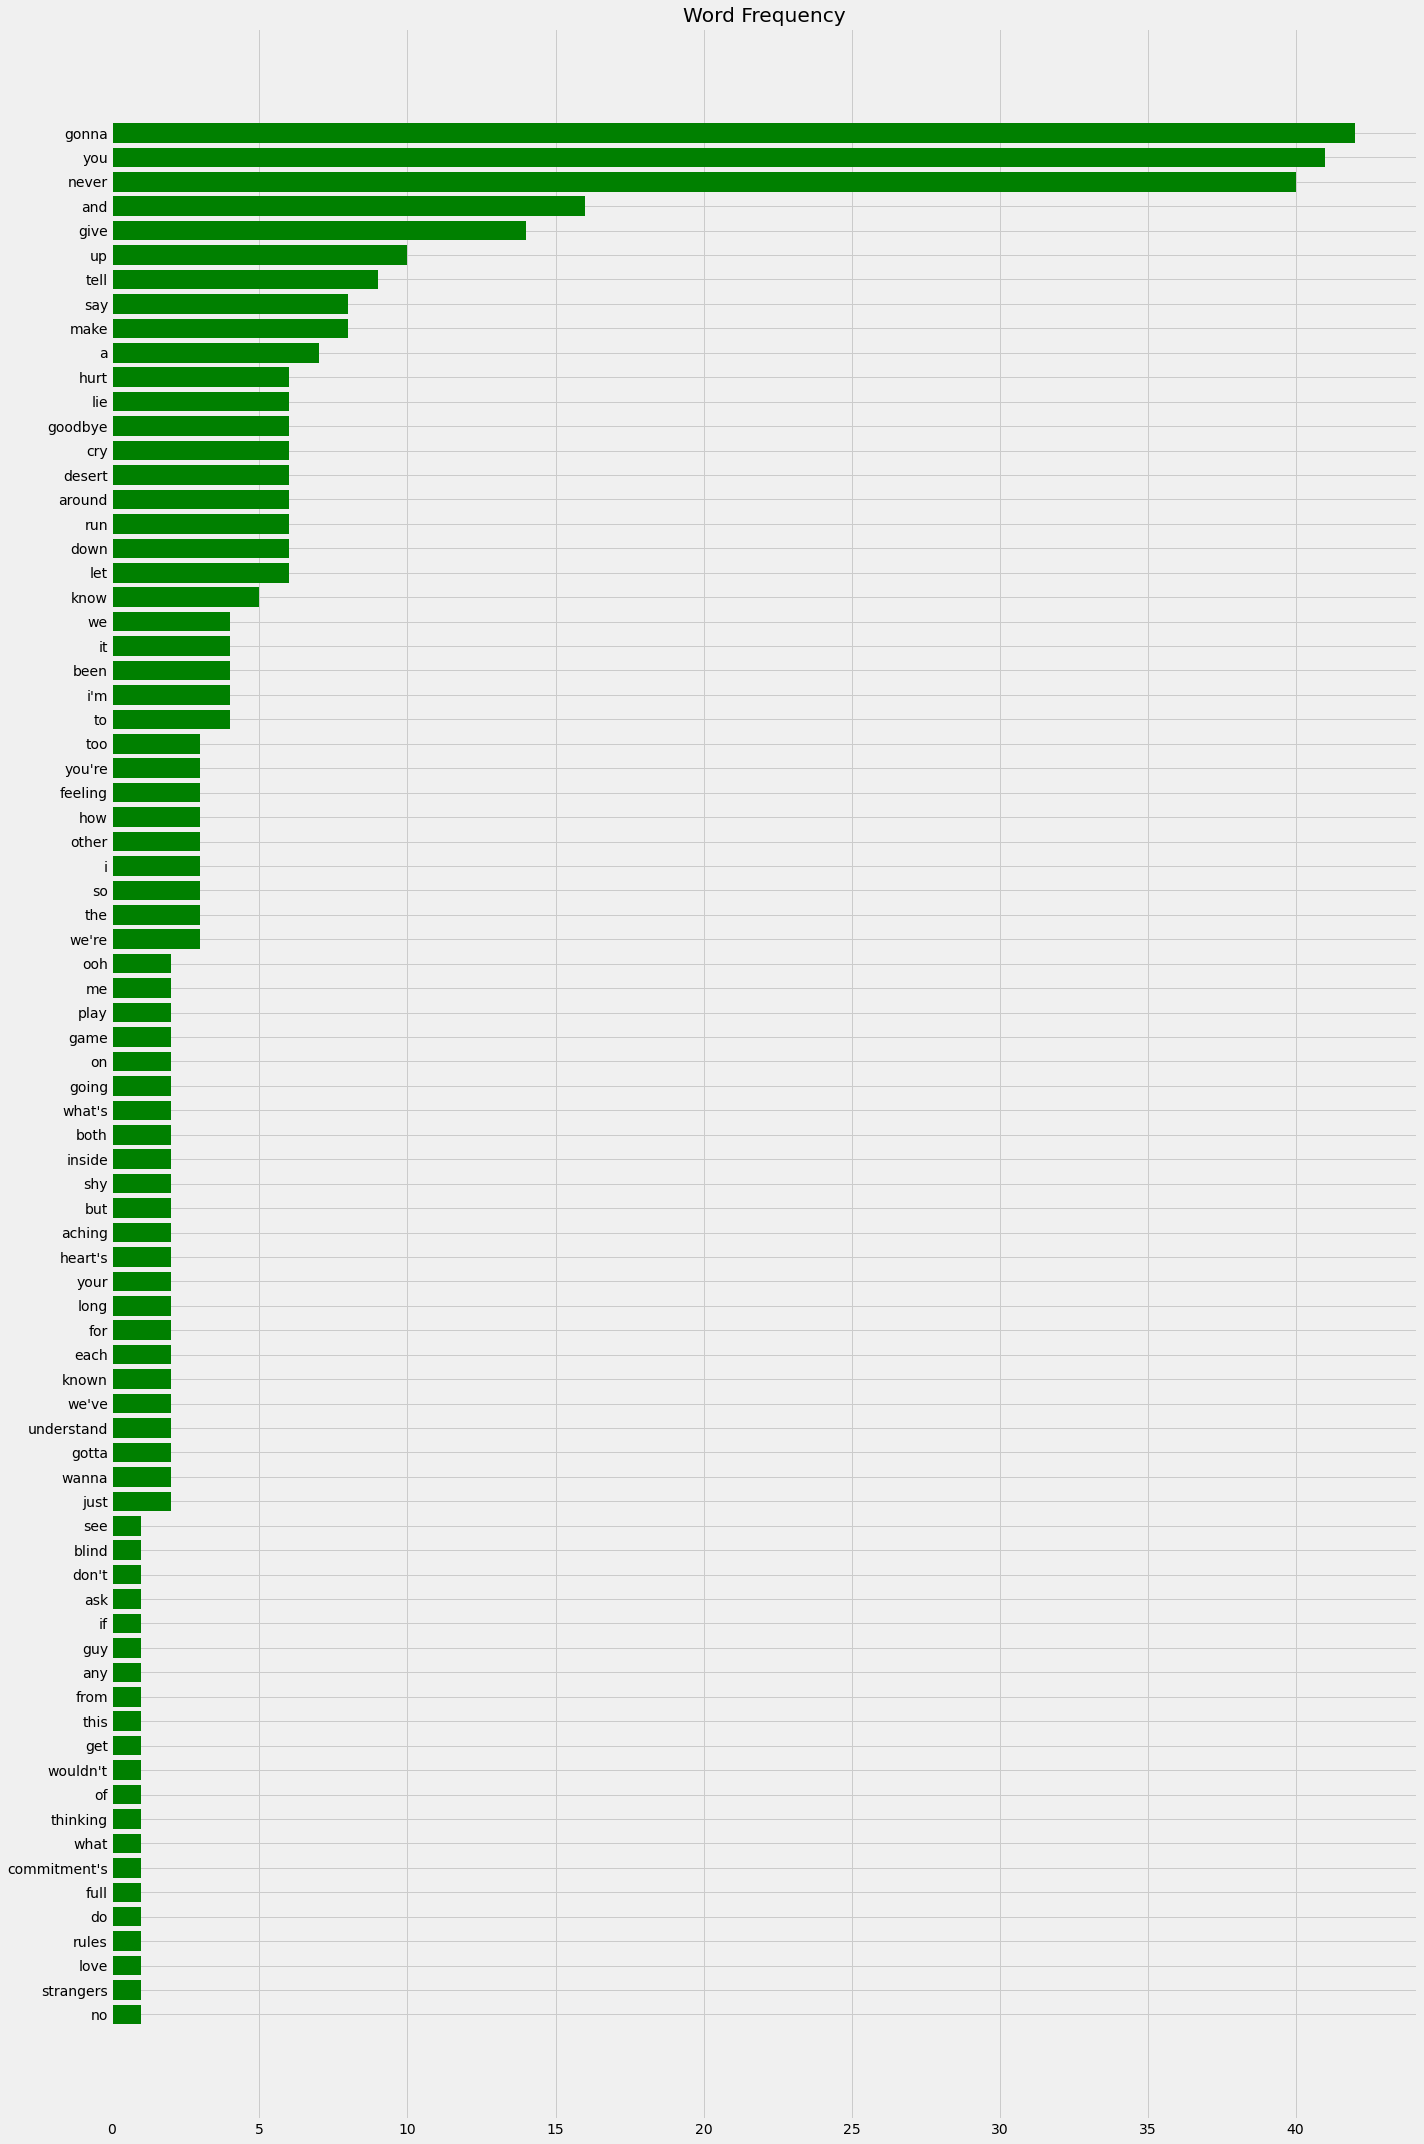

In [22]:
rick_astley_word_freq = get_word_frequencies(lyrics)
rick_astley_word_freq = {k: v for k, v in sorted(rick_astley_word_freq.items(), key=lambda x: x[1])}
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,30))
plt.barh(list(rick_astley_word_freq.keys()), rick_astley_word_freq.values(), color='g')
plt.title("Word Frequency")
plt.tight_layout()
plt.show()

### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 25 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [28]:
url = 'https://genius.com/Yoasobi-racing-into-the-night-yoru-no-kakeru-romanized-lyrics'
jp_lyrics_page = requests.get(url)
jp_soup = BeautifulSoup(jp_lyrics_page.text)
jp_lyrics = jp_soup.find('div', {"class":'lyrics'}).get_text()
jp_word_freq = get_word_frequencies(jp_lyrics)
print(jp_lyrics)



[INTRO]
Shizumu you ni tokete yuku you ni
Futaridake no sora ga hirogaru yoru ni

[VERSE]
Sayonara dakedatta
Sono hitokoto de subete ga wakatta
Higa shizumi dashita sora to kimi no sugata
FENSUgoshi ni kasanatte ita

Hajimeta atta hi kara
Boku no kokoro no subete wo ubatta
Doko ka hakanai kuuki wo matou kimi wa
Sabishii me wo shiteta nda

[PRE-Chorus]
Itsu datte CHIKKUTAKKU to
Naru sekai de nando datte sa
Fureru kakaronai kotoba urusai koe ni
Namida ga kobore sou demo
Arikitarina yorokobi kitto futarinara mitsuke rareru

[Chorus]
Sawagashii hibi ni waraenai kimi ni
Omoitsuku kagiri mabushii asu wo
Akenai yoru ni ochite yuku mae ni
Boku no te wo tsukan de hora
Wasurete shimaitakute tokikometa hibi mo
Dakishimeta nukumori de tokasukara
Kowakunai yo itsuka higanoboru made
Futari de iyou

[VERSE]
Kimi ni shika mienai
Nanika wo mitsumeru kimi ga kiraida
Mitorete iru ka no youna koi suru youna
Sonna kao ga kiraida

Shinjite itaikеdo shinji renai koto
Sonna no dou shitatte kitto
Korekara da

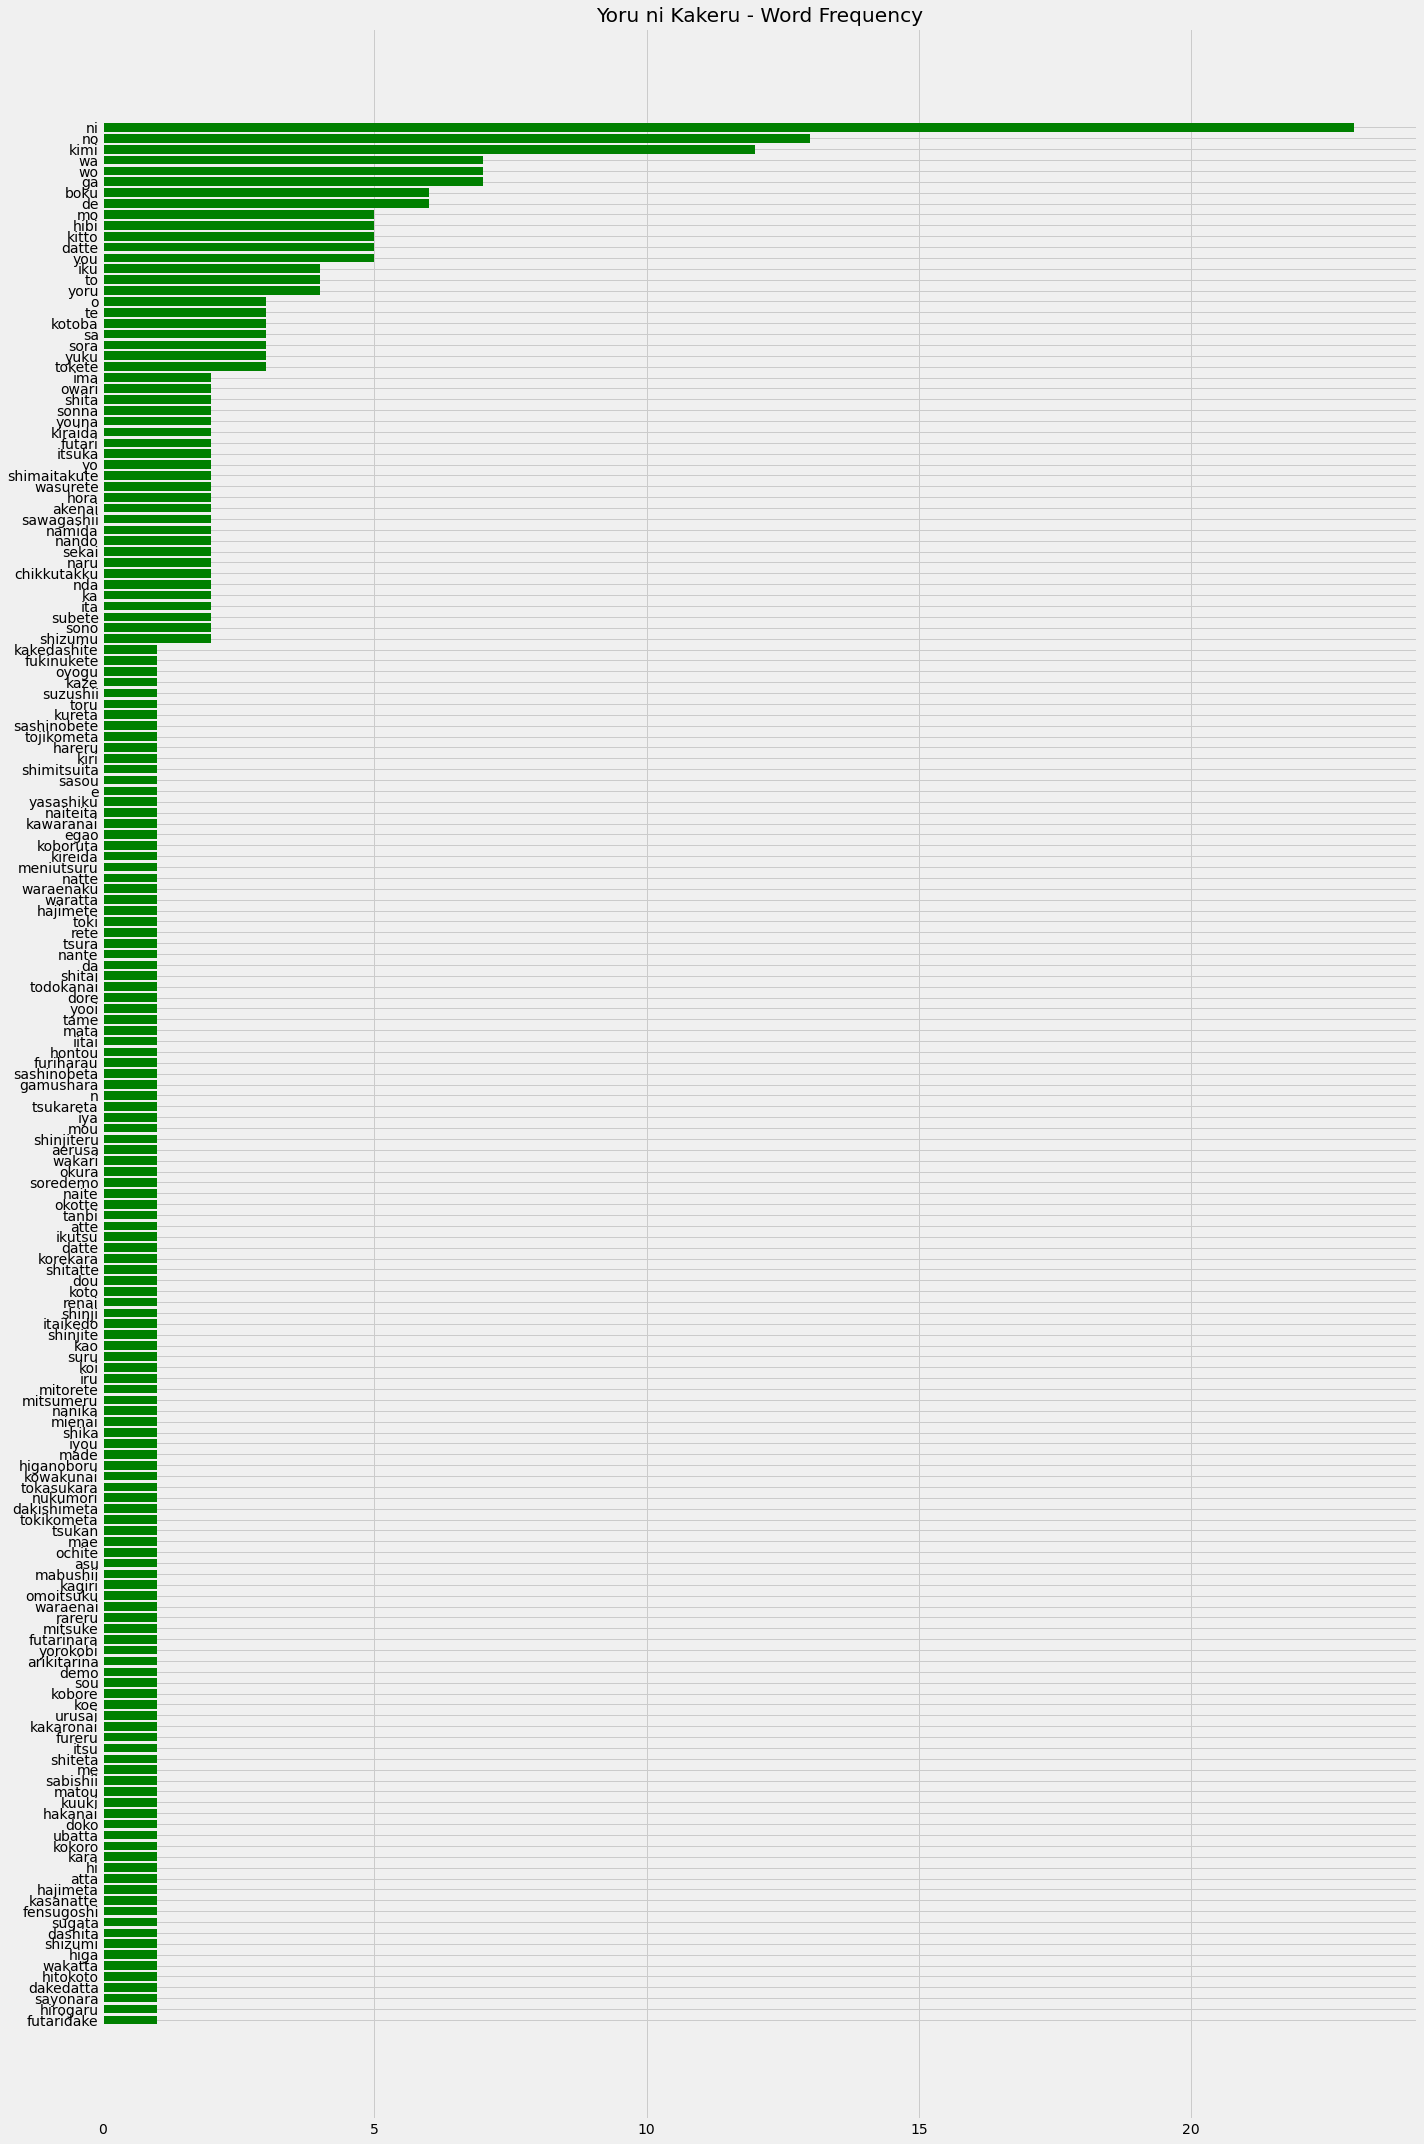

In [29]:
word_freq = {k: v for k, v in sorted(jp_word_freq.items(), key=lambda x: x[1])}
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,30))
plt.barh(list(word_freq.keys()), word_freq.values(), color='g')
plt.title("Yoru ni Kakeru - Word Frequency")
plt.tight_layout()
plt.show()

In [30]:
url = 'https://genius.com/Ariana-grande-34-35-lyrics'
en_lyrics_page = requests.get(url)
en_soup = BeautifulSoup(en_lyrics_page.text)
en_lyrics_div = en_soup.find('div', {"class":'lyrics'})
en_lyrics = en_lyrics_div.get_text()
en_word_freq = get_word_frequencies(en_lyrics)
print(en_lyrics)



[Intro]
Hmm

[Verse 1]
You might think I'm crazy
The way I've been cravin'
If I put it quite plainly
Just gimme them babies
So what you doin' tonight?
Better say, "Doin' you right" (Yeah)
Watchin' movies, but we ain't seen a thing tonight (Yeah)

[Pre-Chorus]
I don't wanna keep you up (You up)
But show me, can you keep it up? (It up)
'Cause then I'll have to keep you up
Shit, maybe I'ma keep you up, boy
I've been drinkin' coffee (I've been drinkin' coffee; coffee)
And I've been eatin' healthy (I've been eatin' healthy; healthy)
You know I keep it squeaky, yeah (You know I keep it squeaky)
Savin' up my energy (Yeah, yeah, savin' up my energy)

[Chorus]
Can you stay up all night?
Fuck me 'til the daylight
Thirty-four, thirty-five (Yeah, yeah, yeah, yeah)
Can you stay up all night? (All night)
Fuck mе 'til the daylight
Thirty-four, thirty-five (Yeah, yеah, yeah, yeah)

[Verse 2]
You drink it just like water (Water)
You say it tastes like candy
So what you doin' tonight? (Tonight)
Better

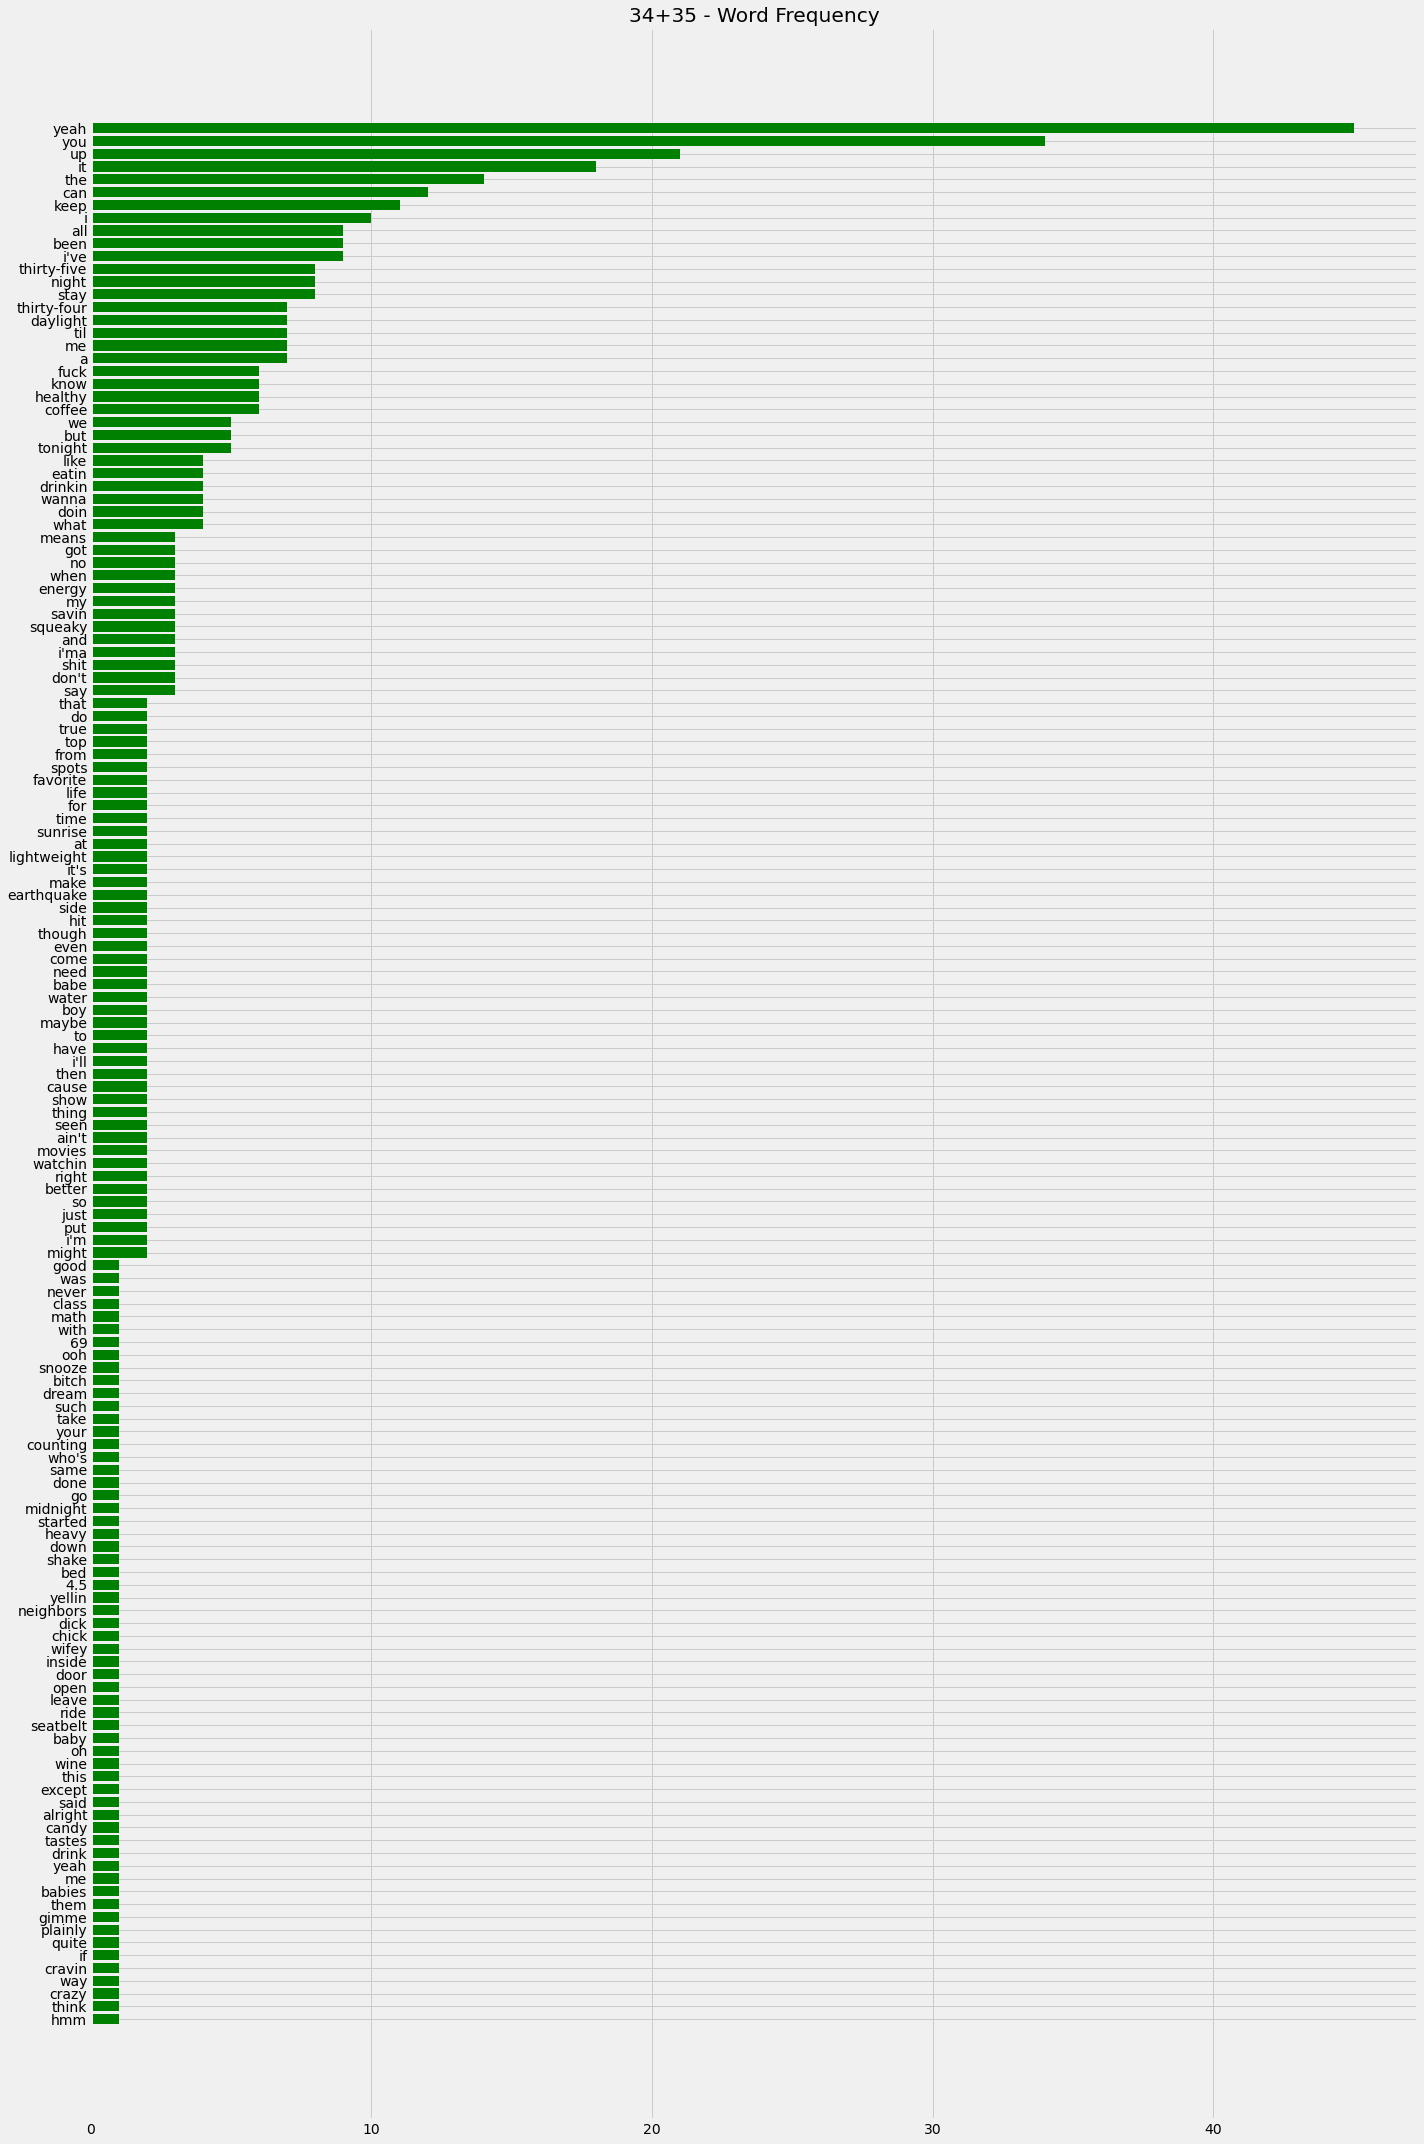

In [31]:
word_freq = {k: v for k, v in sorted(en_word_freq.items(), key=lambda x: x[1])}
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,30))
plt.barh(list(word_freq.keys()), word_freq.values(), color='g')
plt.title("34+35 - Word Frequency")
plt.tight_layout()
plt.show()

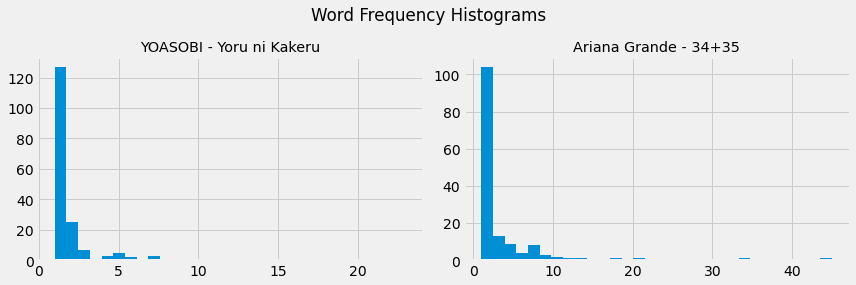

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Word Frequency Histograms")
plt.style.use('ggplot')
ax[0].hist(jp_word_freq.values(), bins=30)
ax[0].set_title("YOASOBI - Yoru ni Kakeru")
ax[1].hist(en_word_freq.values(), bins=30)
ax[1].set_title("Ariana Grande - 34+35")
plt.tight_layout()
plt.show()

Findings:

The frequency distributions are heavily skewed right. Most words are mentioned only a couple of times with only a few words being mentioned at a very high frequency.